# Graded Challenge 2

By Wirawan Setio Aji <br>
Batch 014

## Description

&nbsp; Pada graded challenge ke-2 ini terdapat 2 masalah dengan narasi yang sama, yaitu menjadi datascientist pada San Francisco Smart City dan bertugas mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya.

### Objective

Dari Narasi tersebut terdapat objective berupa **Pengambilan**, **2 Role Problem** dan **6 Pertanyaan konseptual** pada setiap Problemnyayang harus di selesaikan.

1. Dari Dataset `san_francisco_bikeshare` Dapatkan sebuah tabel sesuai dengan kriteria berikut : 
    - Pilih **HANYA** kolom `trip_id`, `start_date`, `start_station_name`, `end_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude` pada tabel `san_francisco_bikeshare.bikeshare_trips`, dan `region_id` pada tabel `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info`.

    - Nilai `start_station_name` tidak boleh sama dengan `end_station_name`

    - Kolom `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, dan `end_station_longitude` tidak boleh ada nilai `null`

    - Pilih `start_date` dengan rentang tanggal lahir kamu di tahun 2017 sampai 5 bulan berikutnya. 

2. **Role problem 1** :  mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung **PageRank** menggunakan *Eigendecomposition*. dengan pertanyaan konseptual sebagai berikut :

    - Mengapa dalam kasus ini kita menerapkan konsep *Eigendecomposition*?

    - Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe `df_matrix_square` dibandingkan `df_matrix` untuk dilakukan proses *Eigendecomposition*? Berikan alasan yang logis sesuai dengan konsep *Eigendecomposition*.

    - Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan?

3. **Role Problem 2** hitung luas area lingkup stasiun awal sepeda di kota San Francisco. dengan pertanyaan konseptual sebagai berikut :
    - Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!

    - Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?

    - Apakah diperlukan mendefinisikan fungsi matematis ( seperti `f(x) = x^2+2` ) pada kasus ini? Berikan penjelasan dan alasanmu!


## Working Area


### Data Retrieve

berikut merupakan **query SQL** yang digunakan untuk mengambil data
```
SELECT trips.trip_id,trips.start_date, trips.start_station_name, trips.end_station_name, trips.start_station_latitude, trips.start_station_longitude, trips.end_station_latitude,trips.end_station_longitude, stations.region_id
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` AS trips
join `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` AS stations
ON trips.start_station_name = stations.name
where trips.start_station_id != trips.end_station_id and trips.end_station_latitude is not null and trips.end_station_longitude is not null and trips.start_station_latitude is not null and trips.start_station_longitude is not null and trips.start_date between '2017-10-30' and '2018-3-30'

### Import Library dan Load Data

**Import Libraries**

In [24]:
import pandas as pd # untuk dataframes
from scipy.integrate import trapz # menghitung kalkulus numerik
import sympy as sy # sympy untuk symbol untuk deg^2
import numpy as np # untuk membentuk array matrix dan vector
import matplotlib.pyplot as plt # untuk data visual

**Load Data**

In [25]:
# path local data
path = './data/h8dsft_P0GC2_Set_1_wirawan_setio_aji.csv'
dataset = pd.read_csv(path)

# check data
dataset.info()

# melihat semua columns
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38356 entries, 0 to 38355
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  38356 non-null  object 
 1   start_date               38356 non-null  object 
 2   start_station_name       38356 non-null  object 
 3   end_station_name         38356 non-null  object 
 4   start_station_latitude   38356 non-null  float64
 5   start_station_longitude  38356 non-null  float64
 6   end_station_latitude     38356 non-null  float64
 7   end_station_longitude    38356 non-null  float64
 8   region_id                33804 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


Tidak terdapat **missing value** pada dataframe

Tampilan data dari **.head()**

In [26]:
dataset.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,2512018021317150200,2018-02-13T17:15:02Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12.0
1,1822018032712462300,2018-03-27T12:46:23Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12.0
2,11202017121808201100,2017-12-18T08:20:11Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12.0
3,4042018013111583100,2018-01-31T11:58:31Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12.0
4,20742017111513002900,2017-11-15T13:00:29Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12.0


Tampilan data dari **.tail()**

In [27]:
dataset.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
38351,21982017110908112800,2017-11-09T08:11:28Z,San Antonio Park,Market St at 8th St,37.79014,-122.242373,37.803686,-122.282497,12.0
38352,34702018011607590800,2018-01-16T07:59:08Z,San Antonio Park,Market St at 8th St,37.79014,-122.242373,37.803686,-122.282497,12.0
38353,19532017121908115700,2017-12-19T08:11:57Z,San Antonio Park,Market St at 8th St,37.79014,-122.242373,37.803686,-122.282497,12.0
38354,362017112108043100,2017-11-21T08:04:31Z,San Antonio Park,Market St at 8th St,37.79014,-122.242373,37.803686,-122.282497,12.0
38355,17892017111707171900,2017-11-17T07:17:19Z,San Antonio Park,Market St at 8th St,37.79014,-122.242373,37.803686,-122.282497,12.0


### Role Problems 1

 mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung **PageRank** menggunakan *Eigendecomposition*.

#### Solusi Koding

- langkah 1 hingga 9 merupakan process ***Data Preprocessing***

1. variable `start_stations` dan `end_stations` yang masing-masing berisikan list nama stasiun awal dan stasiun akhir.
 Pastikan tidak ada nama stasiun yang duplikat di masing-masing variable.

In [28]:
# using group by to make unique value out of each data set query
# end_stations = list(dataset.groupby(['end_station_name']).groups.keys())
# start_stations = list(dataset.groupby(['start_station_name']).groups.keys())

# using drop_duplicates to make unique value out of each data set query
end_stations = dataset['end_station_name'].drop_duplicates()
start_stations = dataset['start_station_name'].drop_duplicates()
len(start_stations)

282

2. Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan `np.setxor1d(array1,array2)`. Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama `exclusive_stations`

In [29]:
# exclusive_station  
exclusive_stations = np.setxor1d(start_stations,end_stations)

3. Buat dataframe yang berisikan cross-tabulation antara `start_stations` dan `end_stations` menggunakan `pd.crosstab(pd.Series1,pd.Series2)`

In [30]:
# start_station dan end_station dirubah menjadi data series dengan pd.Series() dahulu
df_matrix = pd.crosstab(pd.Series(start_stations),pd.Series(end_stations))
df_matrix

end_station_name,Cahill Park,Duboce Park,Mosswood Park,Precita Park,SAP Center,Snow Park
start_station_name,,,,,,
Bushrod Park,0,0,0,0,0,1
Cahill Park,0,0,0,0,1,0
Duboce Park,0,0,0,1,0,0
Precita Park,0,1,0,0,0,0
SAP Center,1,0,0,0,0,0
Snow Park,0,0,1,0,0,0


dalam `df_matrix` **index** dan **kolom** tidak sama, sehingga tidak dapat menghitung koneksi antar **station** 

4. Backup Data original `dataset` pada variable `df_copy`

In [31]:
df_copy = dataset.copy()

5. dari `df_copy` cari data `start_station_name` dan `end_station_name` yang termasuk dalam list `exclusive_stations`.

In [32]:
# menggunakan df.query()
# df_copy = df_copy.query("start_station_name not in @exclusive_stations and \
#     end_station_name not in @exclusive_stations")

# filter menggunakan query .isin()
df_copy = df_copy[(~df_copy['start_station_name'].isin(exclusive_stations)) & 
        (~df_copy['end_station_name'].isin(exclusive_stations))]
    
df_copy['start_station_name'].unique().shape

(54,)

6. `df_copy` yang sudah difilter jadikan *crosstabulation* menggunakan `pd.crosstab(pd.Series1,pd.Series2)`,dan pastikan matrix berbentuk square matrix

In [33]:
df_matrix_square = pd.crosstab(df_copy['start_station_name'],df_copy['end_station_name'])
df_matrix_square.shape # check jika sudah menjadi Square Matrix

# adanya latency untuk gagal mencapai square matrix
df_matrix_square.shape

(54, 54)

pada shape `df_matrix_square` sudah berupa **square matrix**, dan **index** dan **kolom** sudah sama, sehingga dapat digunakan untuk **Pembobotan Nilai**

7. Jumlahkan nilai kolom masing-masing rows pada `df_matrix_square` menggunakan method `sum(axis=1)` dan simpan ke dalam variable bernama `total_trips`.

In [34]:
total_trips = df_matrix_square.sum(axis=1) # axis = 1 untuk menjumlah setiap column
total_trips.head()

start_station_name
12th St at 4th Ave      34
12th St at 6th Ave       6
18th St at Noe St       90
1st St at Folsom St    167
2nd St at Folsom St    230
dtype: int64

8. Cari nilai **Pembobotan** pada setiap banyak koneksi start-end bike station dengan `total_trips`. Masukkan hasilnya ke variable `weighted_matrix_df`.

In [35]:
# cari hasil terhadap row
weighted_matrix_df = df_matrix_square.div(total_trips,axis='rows')

9. Konversikan `weighted_matrix_df` ke numpy array

In [36]:
weighted_matrix_df = np.array(weighted_matrix_df)
weighted_matrix_df.shape

(54, 54)

- Dari sini ***Data Process*** telah berakhir dan akan dilakukan penerapan ***Eigendecomposition*** pada langkah selanjutnya

10. Hitung ***eigen value*** dan ***eigen vector*** menggunakan library `numpy`.

In [37]:
# simpan eigen value dan eigen vector pada variable
e_value,e_vector = np.linalg.eig(weighted_matrix_df)


hasil **eigen vector** tersimpan pada variable `e_vector` sedangkan **eigen value** pada `e_value`

In [38]:
# cari index eigenvalue tertinggi 
idx_max_value = np.argmax(e_value)
print(f"Nilai Eigenvalue tertinggi : index {idx_max_value} , value : {e_value[idx_max_value].real}")


Nilai Eigenvalue tertinggi : index 7 , value : 1.0000000000000018


Diperoleh Nilai Eigenvalue tertinggi pada **index 7**, dan **nilainya adalah  1.0000000000000018**

11. Score ***PageRank*** terdapat pada **eigen vector** yang mamiliki **eigen value** paling tinggi. Simpan eigen vector tersebut ke dalam variable bernama `PR_Scores`.

In [39]:
PR_Scores = np.abs(e_vector[idx_max_value])
PR_Scores

array([8.25691981e-02, 6.75584122e-03, 9.28436532e-02, 9.28436532e-02,
       3.04858049e-02, 3.04858049e-02, 1.00066327e-01, 2.23606798e-01,
       1.15808293e-01, 3.76020355e-03, 1.92895647e-16, 2.83556036e-16,
       2.46896981e-16, 1.98927311e-15, 1.88878113e-16, 1.88878113e-16,
       8.89375203e-02, 4.77948580e-16, 2.00708590e-01, 2.00708590e-01,
       1.24291932e-01, 1.24291932e-01, 2.74433362e-15, 5.49779796e-17,
       2.49299890e-15, 1.37199903e-01, 1.37199903e-01, 3.68305279e-01,
       1.23785951e-15, 1.23785951e-15, 9.86535739e-16, 9.86535739e-16,
       1.54445379e-16, 1.54445379e-16, 2.46510912e-15, 1.79013140e-14,
       3.82715748e-02, 2.77949318e-01, 2.77949318e-01, 6.09698983e-16,
       6.09698983e-16, 4.34237628e-01, 8.18143020e-15, 9.03604233e-16,
       7.49852620e-16, 7.49852620e-16, 2.79981669e-17, 1.42989451e-16,
       2.74885468e-18, 3.20413722e-15, 5.67403749e-16, 9.51526028e-15,
       4.57508853e-15, 1.63917119e-14])

12. Buat dataframe baru bernama PageRank_df dengan kolom `start_station` yang berisikan value variable `start_stations` dan kolom   `score` yang berisikan value variable `PR_Scores`

In [40]:
# dictionary untuk membuat dataframe dan column
dicts_score = {"start_station": list(df_matrix_square.index),"score":list(PR_Scores.real)}

PageRank_df = pd.DataFrame(data=dicts_score)


13. Tampilkan **head** dari dataframe `PageRank_df`!

In [41]:
PageRank_df.head()



,start_station,score
0,12th St at 4th Ave,0.082569
1,12th St at 6th Ave,0.006756
2,18th St at Noe St,0.092844
3,1st St at Folsom St,0.092844
4,2nd St at Folsom St,0.030486


#### Pertanyaan Konseptual

1. Mengapa dalam kasus ini kita menerapkan konsep Eigendecomposition? 
    - jawab : karena dalam masalah ini kita mencari kualitas hubungan dan pengaruh pada setiap setasiun bikeshare. dan mencari dari antara stasiun yang berhubungan mana yang paling berpengaruh. pada kasus ini `start_station` dan `end_station` saling berhimpunan dan membentuk irisan antara kedua list, banyak hubungan dari irisan tersebut dapat dibuat sebuah ***Adjacency Matrix*** yang nantinya dapat dilakukan perhitungan eigen decomposition yang menghasilkan ***eigenvector*** dan ***eigenvalue***, dan dapat dicari mana station yang paling berpengaruh dengan menganalisa nilai ***eigenvector*** dan ***eigenvalue***


2. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe `df_matrix_square` dibandingkan `df_matrix` untuk dilakukan proses Eigendecomposition?<br>
    - jawab: Dikarenakan pada `df_matrix` memiliki ***cross-tabulation*** dimana belum memisahkan `start_station` dan `end_station` yang saling berhubungan dengan yang tidak berhubungan,sedang `df_matrix_square` telah dipilih mana station yang saling berhubungan dengan membandingkan mana yang tak termasuk dalam `exclusive_station` sehingga  terdapat himpunan irisan di dalam `df_matrix_square` antara  `start_station` dan `end_station` yang saling berhubungan

3.  Jika dilihat dari PageRanknya dimana nilai PageRank paling besar merupakan stasiun yang paling favorit.<br>
    - jawab : skor terbesar ada pada stasiun **Market St at 8th St** dengan skor :	**0.434238**<br>
    - fakta singkat : Market street adalah salah satu jalan raya pusat kota yang dikelilingi oleh Theater district, pusat berjualan ,China Town Tertua di Amerika Utara,alun-alun UNION SQUARE.<br>
 
    ![station of bikeshare](image\bikeshare_station.jpg)
    <br> gambar bikeshare station pada **Market St at 8th St**<br>
    
      ![road condition](image\keadaan_jalan.jpg)
    <br> keadaan jalan **Market St at 8th St** di dominasi dengan kendaraan umum ,pesepeda dan pejalan kaki. Juga tersedia fasilitas jalur sepeda

In [42]:
PageRank_df.sort_values('score',ascending=False).head()

,start_station,score
41,Market St at 8th St,0.434238
27,Esprit Park,0.368305
38,Jackson Playground,0.277949
37,Jack London Square,0.277949
7,45th St at Manila,0.223607


### Role Problem 2
menggunakan integral, hitung luas area lingkup stasiun

#### Solusi Koding

- pada langkah satu merupakan **data processing**
1. Buat variable baru bernama `df_coor_stations` yang berisikan data yang sudah di-load dimana kolom `region_id = 3`. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom `start_station_name`,`start_station_latitude`, dan `start_station_longitude`. Urutkan pula dataframe tersebut berdasarkan `start_station_longitude` dari nilai terkecil hingga terbesar.

In [43]:
df_coor_stations = dataset.query("region_id == 3")
df_coor_stations = df_coor_stations[(['start_station_name','start_station_longitude','start_station_latitude'])].drop_duplicates().sort_values('start_station_longitude').reset_index(drop=True)
df_coor_stations.head()


,start_station_name,start_station_longitude,start_station_latitude
0,McAllister St at Baker St,-122.441838,37.777416
1,O'Farrell St at Divisadero St,-122.439446,37.782405
2,Broderick St at Oak St,-122.439078,37.773063
3,Grove St at Divisadero,-122.437777,37.775946
4,Eureka Valley Recreation Center,-122.436943,37.759177


2. Plot grafik area stasiun-stasiun di San Fransisco

<AxesSubplot:xlabel='start_station_longitude'>

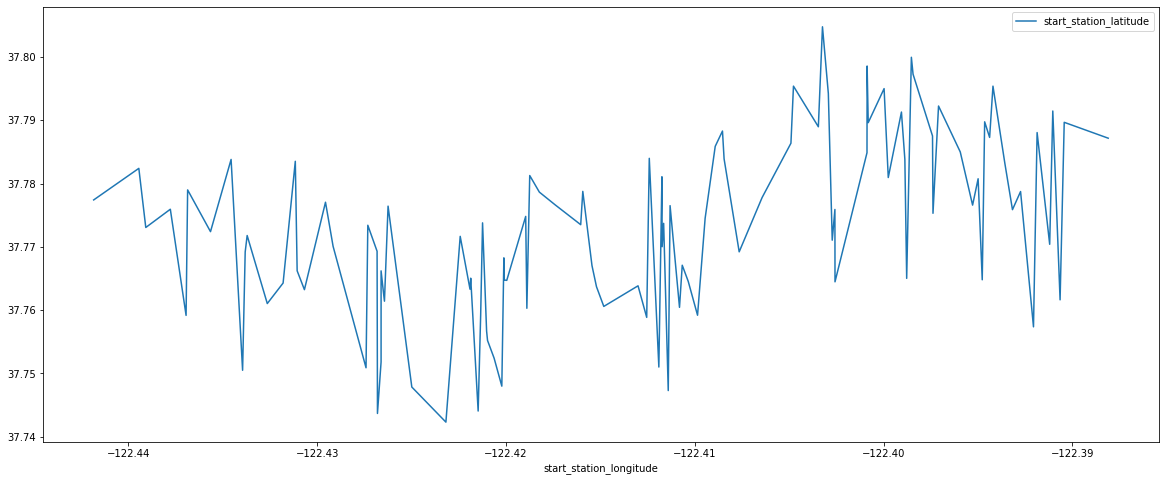

In [44]:
# masukan setiap koordinat dalam variable x,y
x = 'start_station_longitude'
y = 'start_station_latitude'

# plot(x='nama kolom untuk sumbu x',y='nama kolom untuk sumbu y',figsize=(20,8))
df_coor_stations.plot(x=x,y=y,figsize=(20,8))



In [45]:
# mendefinisikan simbol untuk penjelasan hasil dalam unit square degree
deg = sy.Symbol('deg');
# penghitungan luas dengan integral menggunakan trapz
area = trapz(df_coor_stations[y],df_coor_stations[x]) * deg ** 2
print(' luas area yang dilingkup stasiun awal = ')
area



 luas area yang dilingkup stasiun awal = 


2.02993900961816*deg**2

#### Pertanyaan Konseptual


1. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu! 
    - jawab : disini baiknya menggunakan **difinite integral**, karena angka sumbu 'x' telah diketahui dari batas atas hingga batas bawah.
2.  Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?
    - jawab : disini saya menggunakan metode **numerik** , karena dalam datanya sudah diketahui nilai yang fungsi nya, dimana nilai 'x' adalah `start_station_longitude` dan nilai 'y' `adalah start_station_latitude`
3. Apakah diperlukan mendefinisikan fungsi matematis ( seperti f(x) = x^2+2 ) pada kasus ini? Berikan penjelasan dan alasanmu!
    - jawab: **tidak perlu**, karena tidak perlu mencari persamaan rumus fungsi, dan juga didalam library `scypy` sudah memiliki  

## Daftar Pustaka

- Semua jawaban untuk pertanyaan konseptual pada Problem 1 terinspirasi dari sebuah 2 hari pembelajaran yang ber sumber dari :
    1. tabel probabilitas menjadi matrix adjacency, https://www.javatpoint.com/what-is-an-adjacency-matrix 
    2. memahami Bipartite Graph dalam bentuk node, https://en.wikipedia.org/wiki/Bipartite_graph
    3. pemahaman cara merubah Bipartite Graph menjadi adjacency matrix, https://www.youtube.com/watch?v=9C2cpQZVRBA
    4. Penjelasan Bagaimana PageRank menggunakan eigendecomposition, https://www.dhruvonmath.com/2019/03/20/pagerank/
    5. penjelasan akan mengapa eigendecomposition digunakan pada pagerank atau algorithm lain yang menghitung qualitas hubungan dan pengaruhnya https://vitalflux.com/why-when-use-eigenvalue-eigenvector/
    6. insight setasiun terfavorit https://en.wikipedia.org/wiki/Market_Street_(San_Francisco)
    7. gambar setasiun terfavorit ,[Google_Maps](https://www.google.com/maps/place/Market+St+%26+8th+St,+San+Francisco,+CA+94102,+Amerika+Serikat/@37.7679719,-122.4306456,13.68z/data=!4m5!3m4!1s0x8085809b64f3768f:0x4dae635dd9a6a619!8m2!3d37.7787183!4d-122.4147847?hl=id)
   